# Test Functionality of Vizdoom 

In [1]:
from vizdoom import *
import random
import time

import numpy as np
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

### initailize a game

In [7]:
game = DoomGame()
game.load_config("../scenarios/defend_the_line.cfg")
game.set_window_visible(False)
game.init()

In [40]:
game = DoomGame()
game.load_config("../scenarios/simpler_basic.cfg")
game.set_screen_format(ScreenFormat.CRCGCB)
game.set_window_visible(False)
game.init()

In [35]:
game = DoomGame()
game.load_config("../scenarios/rocket_basic.cfg")
game.set_screen_format(ScreenFormat.CRCGCB)
game.set_window_visible(False)
game.init()

## State

In [8]:
game.new_episode()

In [9]:
state = game.get_state()

In [10]:
img = state.screen_buffer # return a numpy array 3x240x320
misc = state.game_variables

In [11]:
misc

array([  79.,  100.])

In [28]:
print("type of image variable: ", type(img))
print("shape of image: ", img.shape)
img_basic = img

type of image variable:  <class 'numpy.ndarray'>
shape of image:  (3, 120, 160)


In [44]:
print("type of image variable: ", type(img))
print("shape of image: ", img.shape)
img_simple = img

type of image variable:  <class 'numpy.ndarray'>
shape of image:  (3, 480, 640)


In [39]:
print("type of image variable: ", type(img))
print("shape of image: ", img.shape)
img_rocket = img

type of image variable:  <class 'numpy.ndarray'>
shape of image:  (3, 480, 640)


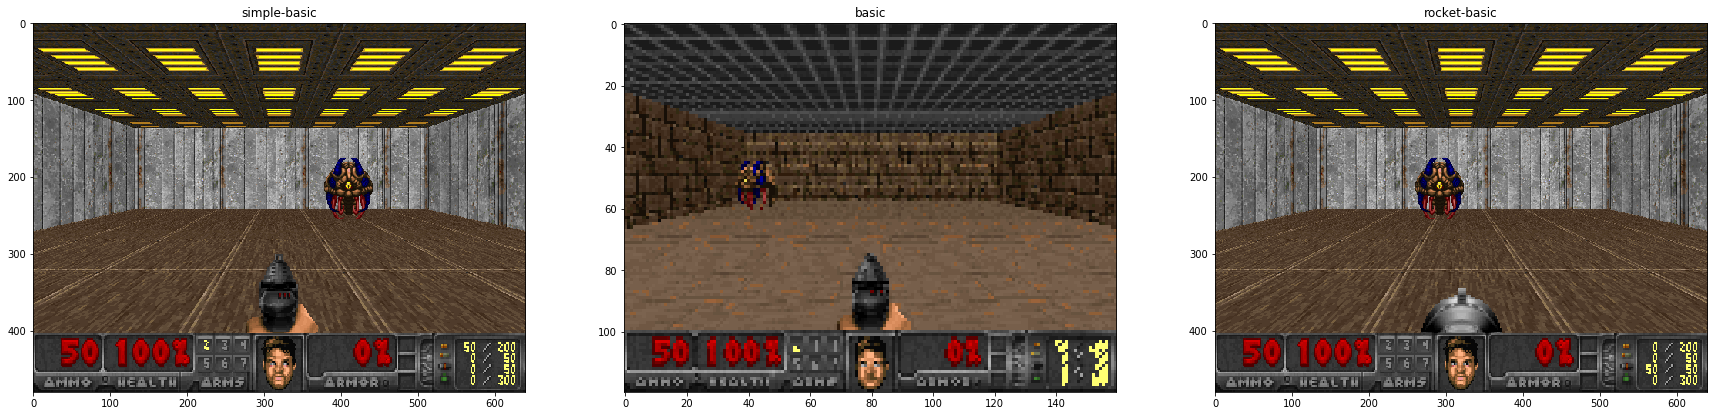

In [45]:
_, axarr = plt.subplots(1,3, figsize=(30,10))

axarr[0].imshow(img_simple.transpose(1,2,0))
axarr[0].set_title("simple-basic")
axarr[1].imshow(img_basic.transpose(1,2,0))
axarr[1].set_title("basic")
axarr[2].imshow(img_rocket.transpose(1,2,0))
axarr[2].set_title("rocket-basic")
plt.show()

In [20]:
plt.imshow(img_simple.transpose(1,2,0))

ValueError: axes don't match array

In [21]:
img_simple.shape

(480, 640)

In [8]:
print("type of game variables: ", type(misc))
print("game variables: ", misc) # what is the meaning of 79 in misc? The text is not clear in the screen.

type of game variables:  <class 'numpy.ndarray'>
game variables:  [ 50.]


#### Some comments:

1. Maybe we should **crop out the bottom part of image** like below.
2. Not quite sure that we can use a **gray-scale** image, because that will reduce the features of the input.
3. Not sure about **rescale the image**: try 100x160x3 

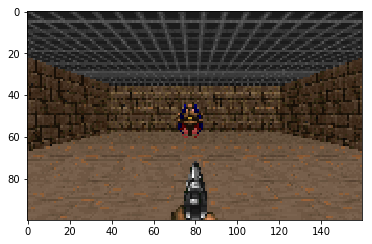

In [10]:
# show a cropped-out image
plt.imshow(img.transpose(1,2,0)[:100,:,:])

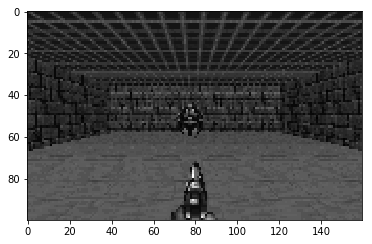

In [11]:
# show a gray-scale image
plt.imshow(np.mean(img.transpose(1,2,0)[:100,:,:], axis=2), cmap="gray")

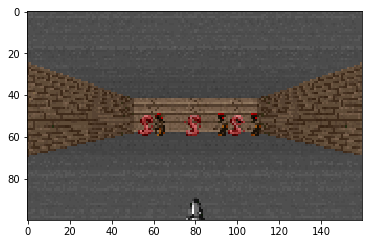

In [16]:
# show a rescaled image, 100x160x3
plt.imshow(img.transpose(1,2,0)[:200,:,:][::2, ::2, :])

## Action

In [17]:
# test: reward = game.make_action(random.choice(actions))
# TODO: how this function works? As it takes a distribution as input, 
# so does it apply e-greedy policy inside the function?